### Multiple Linear Regression: Predicting Bill Clinton Voter Percentage 

Dataset:  [clinton1.dat](http://users.stat.ufl.edu/~winner/data/clinton1.dat)

Source: U.S. Census Bureau

Description: County level results for percent voting for Bill Clinton
in 1992 Presidential Election and Demographic variables.

Variables/Columns

County Name
- Percent voting for Clinton in 1992  (%)
- Median Age  
- Mean Savings($)

- Per capita Income  ($)
- Percent in Poverty   (%) 
- Percent Veterans  (%)
- Percent Female     (%)    
- Population Density     
- Percent in Nursing Homes  (%)      
- Crime Index (Per capita)  

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

pd.options.display.max_rows = 3000
pd.options.display.max_columns = 2000

In [27]:
df = pd.read_csv('clinton.csv')

df.head()


,Unnamed: 0,clinton_vote%,median_age,mean_savings,income_per_capita,poverty%,veterans%,female%,pop_density,nursing_homes%,crime_index
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141


In [28]:
df.columns

Index(['Unnamed: 0', 'clinton_vote%', 'median_age', 'mean_savings',
       'income_per_capita', 'poverty%', 'veterans%', 'female%', 'pop_density',
       'nursing_homes%', 'crime_index'],
      dtype='object')

In [29]:
df.rename(columns={'Unnamed: 0':'location'}, 
                 inplace=True)

In [30]:
df.head()

,location,clinton_vote%,median_age,mean_savings,income_per_capita,poverty%,veterans%,female%,pop_density,nursing_homes%,crime_index
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141


### Let's explore our data a little bit...

In [31]:
df.shape

(2704, 11)

In [32]:
df.dtypes

location              object
clinton_vote%        float64
median_age           float64
mean_savings           int64
income_per_capita      int64
poverty%             float64
veterans%            float64
female%              float64
pop_density          float64
nursing_homes%       float64
crime_index            int64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 11 columns):
location             2704 non-null object
clinton_vote%        2704 non-null float64
median_age           2704 non-null float64
mean_savings         2704 non-null int64
income_per_capita    2704 non-null int64
poverty%             2704 non-null float64
veterans%            2704 non-null float64
female%              2704 non-null float64
pop_density          2704 non-null float64
nursing_homes%       2704 non-null float64
crime_index          2704 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 232.5+ KB


In [34]:
df.describe()

,clinton_vote%,median_age,mean_savings,income_per_capita,poverty%,veterans%,female%,pop_density,nursing_homes%,crime_index
count,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000
mean,39.609756,34.444527,89939.367234,16389.286612,16.079993,11.422685,51.002533,195.236391,9.476124,304.492234
std,10.181718,3.534576,41462.182192,3378.824446,6.658371,2.306871,1.472173,941.707347,6.283713,217.101571
min,9.550000,20.000000,7472.000000,6118.000000,1.900000,2.780000,37.530000,0.400000,0.080000,0.000000
25%,32.867500,32.475000,62983.000000,14202.000000,11.400000,9.850000,50.400000,19.375000,5.150000,149.000000
50%,38.965000,34.300000,83273.500000,15943.000000,14.900000,11.440000,51.130000,44.000000,7.875000,260.500000
75%,45.672500,36.400000,107890.000000,17873.000000,19.400000,13.002500,51.850000,108.500000,11.922500,411.000000
max,84.640000,55.400000,631534.000000,37387.000000,52.000000,27.290000,55.390000,32360.300000,59.220000,2792.000000


#### Maybe do some plotting...

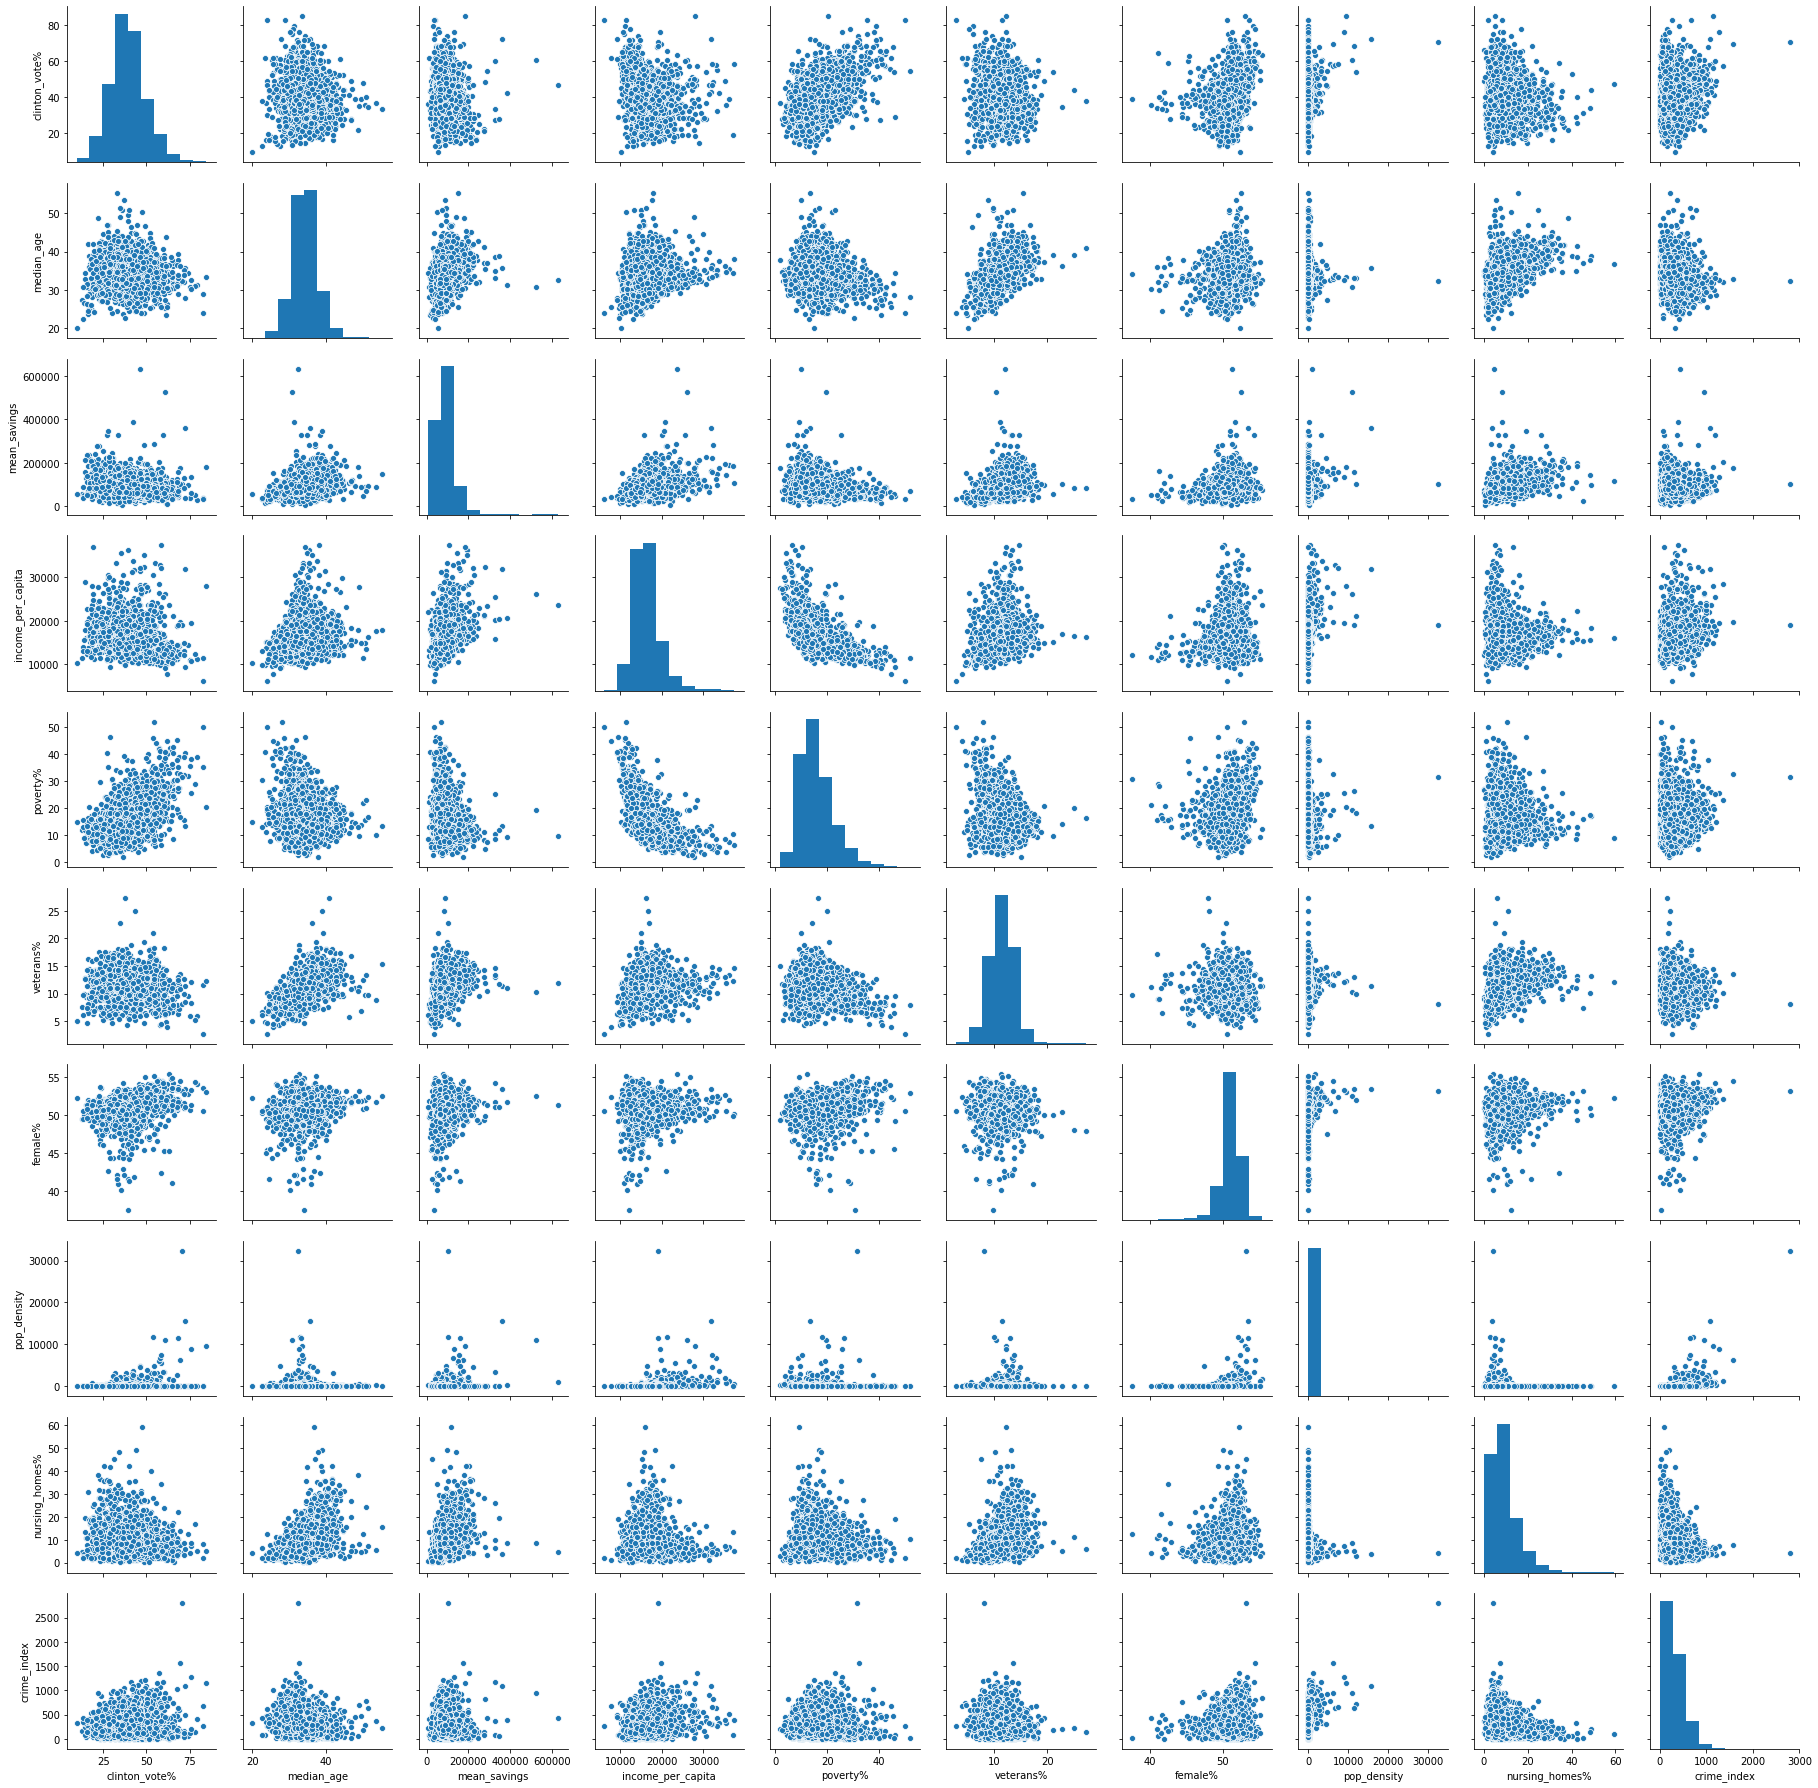

In [35]:
sns.pairplot(df)

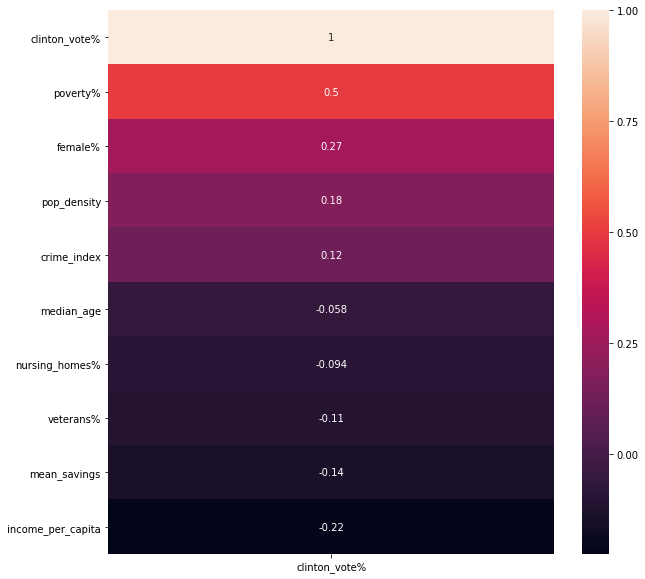

In [36]:
plt.figure(figsize = (10, 10))
corr = df.corr()
corr_sort = corr.sort_values(by = ['clinton_vote%'], axis = 0, ascending = False)
corr_sort
sns.heatmap(corr_sort[['clinton_vote%']], annot=True)

### If we wanted to build Linear Regression Model, what do we need to do?

#### Let's try this again using Train-Test-Split!!!

In [137]:
from sklearn.model_selection import train_test_split

In [143]:
### Check out our coefficients
list(zip(X.columns, lr.coef_))

[('poverty%', 0.7267099184235002),
 ('female%', 1.158843288983302),
 ('pop_density', 0.0015182775154210962)]

### Let's try making a new feature....

#### Interaction Terms:
    - Interaction terms are just one variable multiplied by another variable

In [22]:
df[''] = (df[''] * df[''])

In [23]:
df.head()

,location,clinton_vote%,median_age,mean_savings,income_per_capita,poverty%,veterans%,female%,pop_density,nursing_homes%,crime_index,femaleXpoverty
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,781.432
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,698.224
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1325.750
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,767.250
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1675.080


In [126]:
y = df['']
X = df[['']]

In [132]:
### Check out our coefficients
list(zip(X.columns, linreg.coef_))

[('femaleXpoverty', 0.015286205038997894),
 ('pop_density', 0.0016916510262487423),
 ('median_age', 0.08231762678972947)]